In [1]:
import pandas as pd

# Load the dataset
data = pd.read_csv('insurance.csv')

In [2]:
# Display the first few rows of the dataset
print(data.head())

   age     sex     bmi  children smoker     region      charges
0   19  female  27.900         0    yes  southwest  16884.92400
1   18    male  33.770         1     no  southeast   1725.55230
2   28    male  33.000         3     no  southeast   4449.46200
3   33    male  22.705         0     no  northwest  21984.47061
4   32    male  28.880         0     no  northwest   3866.85520


In [3]:
# One-hot encoding for categorical variables
data = pd.get_dummies(data, columns=['sex', 'smoker', 'region'], drop_first=True)

In [4]:
print(data.head())

   age     bmi  children      charges  sex_male  smoker_yes  region_northwest  \
0   19  27.900         0  16884.92400     False        True             False   
1   18  33.770         1   1725.55230      True       False             False   
2   28  33.000         3   4449.46200      True       False             False   
3   33  22.705         0  21984.47061      True       False              True   
4   32  28.880         0   3866.85520      True       False              True   

   region_southeast  region_southwest  
0             False              True  
1              True             False  
2              True             False  
3             False             False  
4             False             False  


In [5]:
#handle missing values

# Check for missing values  

print(data.isnull().sum())

age                 0
bmi                 0
children            0
charges             0
sex_male            0
smoker_yes          0
region_northwest    0
region_southeast    0
region_southwest    0
dtype: int64


In [6]:
X = data.drop('charges', axis=1)  # Features
y = data['charges']                # Target variable

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [9]:
from sklearn.metrics import mean_absolute_error

# Make predictions
y_pred = model.predict(X_test)

# Calculate Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print(f'Mean Absolute Error: {mae}')

Mean Absolute Error: 2550.0784706115096


In [10]:
#evaluate the model

from sklearn.metrics import r2_score

# Calculate R^2 score
r2 = r2_score(y_test, y_pred)
print(f'R^2 score: {r2}')



R^2 score: 0.8651034329144947


In [11]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_estimators': [100, 200], 'max_depth': [10, 20]}
grid_search = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print(grid_search.best_params_)

{'max_depth': 10, 'n_estimators': 100}


In [12]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')
print(f"Mean MAE from Cross-validation: {-cv_scores.mean()}")

Mean MAE from Cross-validation: 2785.114790818882


In [13]:
from sklearn.model_selection import RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search = RandomizedSearchCV(RandomForestRegressor(), param_grid, n_iter=10, cv=5)
random_search.fit(X_train, y_train)
print(random_search.best_params_)

{'n_estimators': 200, 'min_samples_split': 10, 'min_samples_leaf': 2, 'max_depth': 10}


In [14]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the model with the best parameters
model = RandomForestRegressor(n_estimators=200, 
                               min_samples_split=10, 
                               min_samples_leaf=2, 
                               max_depth=10)

# Train the model
model.fit(X_train, y_train)

# Make predictions
predictions = model.predict(X_test)

In [15]:
from sklearn.metrics import mean_absolute_error, r2_score

# Calculate MAE and R²
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error (MAE): 2494.719817669959
R² Score: 0.8753823255048816


In [16]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='neg_mean_absolute_error')

# Print the mean MAE from cross-validation
print(f"Mean MAE from Cross-validation: {-cv_scores.mean()}")

Mean MAE from Cross-validation: 2689.7221060466736


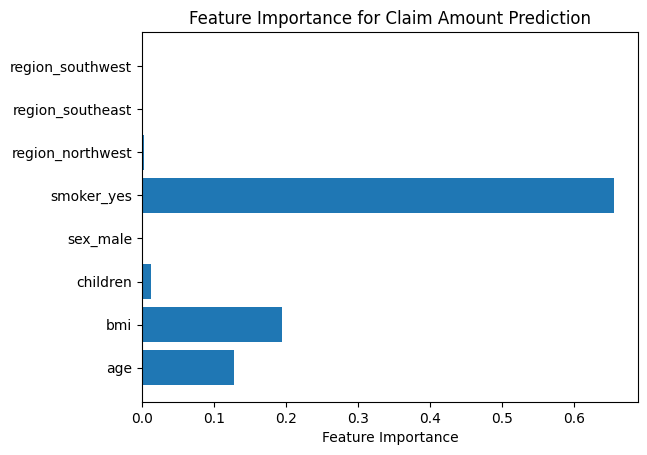

In [17]:
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = model.feature_importances_

# Plot feature importances
plt.barh(X_train.columns, feature_importances)
plt.xlabel('Feature Importance')
plt.title('Feature Importance for Claim Amount Prediction')
plt.show()

In [18]:
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error
import numpy as np

# Calculate MAE and R²
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)
rmse = np.sqrt(mean_squared_error(y_test, predictions))

print(f"Mean Absolute Error (MAE): {mae}")
print(f"R² Score: {r2}")
print(f"Root Mean Squared Error (RMSE): {rmse}")

Mean Absolute Error (MAE): 2494.719817669959
R² Score: 0.8753823255048816
Root Mean Squared Error (RMSE): 4398.4924561515245


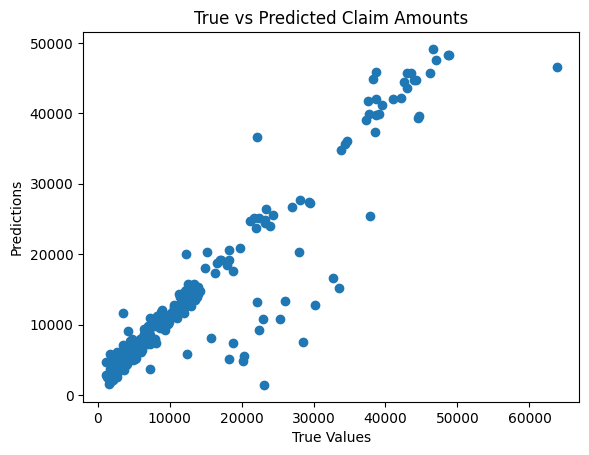

In [19]:
import matplotlib.pyplot as plt

plt.scatter(y_test, predictions)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True vs Predicted Claim Amounts")
plt.show()

In [20]:
import joblib

# Save the model to a file
joblib.dump(model, 'claim_predictor_model.pkl')

['claim_predictor_model.pkl']

In [34]:
# Make predictions on the entire dataset
all_predictions = model.predict(X)

# Calculate Mean Absolute Error on the entire dataset
all_mae = mean_absolute_error(y, all_predictions)
print(f'Mean Absolute Error on the entire dataset: {all_mae}')

# Calculate R² score on the entire dataset
all_r2 = r2_score(y, all_predictions)
print(f'R² score on the entire dataset: {all_r2}')

Mean Absolute Error on the entire dataset: 4711.985866084063
R² score on the entire dataset: 0.6762251484511588


In [35]:
# Assuming your trained model is stored in 'model'
print(f"Number of features the model was trained on: {model.n_features_in_}")

Number of features the model was trained on: 8


In [36]:
# Check the columns used in training
print(X_train.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region_northwest',
       'region_southeast', 'region_southwest'],
      dtype='object')


In [39]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your dataset
data = pd.read_csv("/Users/daniyalrosli/isp624 projects/insurance.csv")

# Encode the 'region' column using LabelEncoder (if you still want to use region as a feature)
label_encoder = LabelEncoder()
data['region'] = label_encoder.fit_transform(data['region'])

# Verify the features
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [40]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

# Prepare your features (X) and target (y)
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']  # or log-transformed 'charges' if you used log transformation

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

ValueError: could not convert string to float: 'female'

In [46]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Load your dataset
data = pd.read_csv("/Users/daniyalrosli/isp624 projects/insurance.csv")

# Encode the 'sex' column using LabelEncoder
label_encoder = LabelEncoder()
data['sex'] = label_encoder.fit_transform(data['sex'])

# Encode the 'smoker' column using LabelEncoder
data['smoker'] = label_encoder.fit_transform(data['smoker'])

# Drop the one-hot encoded region columns if they exist
columns_to_drop = ['region_northwest', 'region_southeast', 'region_southwest']
data = data.drop(columns=[col for col in columns_to_drop if col in data.columns])

# Encode the 'region' column using LabelEncoder
data['region'] = label_encoder.fit_transform(data['region'])

# Verify the features
print(data.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')


In [47]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score

# Prepare your features (X) and target (y)
X = data[['age', 'sex', 'bmi', 'children', 'smoker', 'region']]
y = data['charges']  # or log-transformed 'charges' if you used log transformation

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Evaluate the model
y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error: {mae}")
print(f"R² Score: {r2}")

Mean Absolute Error: 2533.674643617756
R² Score: 0.8642606273649586


In [48]:
# Assuming your trained model is stored in 'model'
print(f"Number of features the model was trained on: {model.n_features_in_}")

Number of features the model was trained on: 6


In [49]:
print(X_train.columns)

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region'], dtype='object')


In [50]:
# Make predictions on the test dataset
test_predictions = model.predict(X_test)

# Calculate Mean Absolute Error on the test dataset
test_mae = mean_absolute_error(y_test, test_predictions)
print(f'Mean Absolute Error on the test dataset: {test_mae}')

# Calculate R² score on the test dataset
test_r2 = r2_score(y_test, test_predictions)
print(f'R² score on the test dataset: {test_r2}')

Mean Absolute Error on the test dataset: 2533.674643617756
R² score on the test dataset: 0.8642606273649586


In [51]:
import joblib

# Save the latest model to a file
joblib.dump(model, 'latest_claim_predictor_model.pkl')

['latest_claim_predictor_model.pkl']